In [36]:
import requests
import json

# Let's assume we have this list of elements from a sheet
elements = ['Fe', 'Al', 'O']

# Convert the list of elements to the required string format for the API
element_str = ','.join(elements)

# Define the fields you want to retrieve
fields = ['name', 'entry_id', 'spacegroup', 'ntypes', 'band_gap', 'delta_e']

# Convert the fields list to a string format
fields_str = ','.join(fields)

# Set the base URL for the API
base_url = 'http://oqmd.org/oqmdapi/formationenergy'

# Construct the API URL
api_url = f'{base_url}?fields={fields_str}&filter=element_set=({element_str})'

# Fetch the data from the API
response = requests.get(api_url)

# Convert the response to JSON
data = response.json()

# Pretty print the returned data
print(json.dumps(data, indent=4))


{
    "links": {
        "next": "http://oqmd.org/oqmdapi/formationenergy?fields=name%2Centry_id%2Cspacegroup%2Cntypes%2Cband_gap%2Cdelta_e&filter=element_set%3D%28Fe%2CAl%2CO%29&limit=50&offset=50",
        "previous": null,
        "base_url": {
            "href": "https://oqmd.org/oqmdapi",
            "meta": {
                "_oqmd_version": "1.0"
            }
        }
    },
    "resource": {},
    "data": [
        {
            "name": "AlFeAg2O4",
            "entry_id": 1630631,
            "spacegroup": "P-3m1",
            "ntypes": 4,
            "band_gap": 1.241,
            "delta_e": -1.6734264008661572
        },
        {
            "name": "AlFeAg2O4",
            "entry_id": 1635540,
            "spacegroup": "P-3m1",
            "ntypes": 4,
            "band_gap": 1.241,
            "delta_e": -1.6734264008661572
        },
        {
            "name": "AlFeAsO",
            "entry_id": 1025915,
            "spacegroup": "P4/nmm",
            "ntypes": 4,
 

In [37]:
import pandas as pd
import requests
import json
import os

# Check if directory exists and if not, create it
if not os.path.exists('data'):
    os.makedirs('data')

# Load the CSV data into a pandas DataFrame
data = pd.read_csv('updated_intern_data.csv')

# Define the fields you want to retrieve
fields = ['name', 'entry_id', 'spacegroup', 'ntypes', 'band_gap', 'delta_e']

# Convert the fields list to a string format
fields_str = ','.join(fields)

# Set the base URL for the API
base_url = 'http://oqmd.org/oqmdapi/formationenergy'

# Loop over each symbol in the 'Chemical_Symbol' column
for symbol in data['Chemical_Symbol']:
    # Construct the API URL
    api_url = f'{base_url}?fields={fields_str}&filter=element_set=({symbol})'

    # Fetch the data from the API
    response = requests.get(api_url)

    # Check the status of the response
    if response.status_code == 200:
        # Convert the response to JSON
        api_data = response.json()

        # Save the JSON data to a file
        with open(f'data/{symbol}_response_data.json', 'w') as f:
            json.dump(api_data, f, indent=4)
    else:
        print(f"Failed to get data for {symbol}")


KeyboardInterrupt: 

In [ ]:
import requests
import json
import pandas as pd

# Load the CSV data into a pandas DataFrame
data = pd.read_csv('updated_intern_data.csv')

# Set the base URL for the API
base_url = 'http://oqmd.org/oqmdapi/formationenergy'

# Initialize an empty list to store the data
data_list = []

# Loop over each row in the DataFrame
for idx, row in data.iterrows():
    # Get the chemical symbol from the row
    symbol = row['Chemical_Symbol']

    # Construct the API URL
    api_url = f'{base_url}?filter=element_set=({symbol})&format=json&limit=50&offset=50'

    # Fetch the data from the API
    response = requests.get(api_url)

    # Check the status of the response
    if response.status_code == 200:
        # Convert the response to JSON
        api_data = response.json()

        # Add the JSON data to the list
        data_list.append(api_data)
    else:
        print(f"Failed to get data for row {idx}")

# Save the JSON data to a file
with open('combined_data.json', 'w') as f:
    json.dump(data_list, f, indent=4)


Failed to get data for row 30
Failed to get data for row 31
Failed to get data for row 32
Failed to get data for row 40
Failed to get data for row 41
Failed to get data for row 42
Failed to get data for row 46
Failed to get data for row 47
Failed to get data for row 48
Failed to get data for row 49
Failed to get data for row 50
Failed to get data for row 51
Failed to get data for row 52
Failed to get data for row 53
Failed to get data for row 54


In [ ]:
import json

# Open the JSON file
with open('combined_data.json') as f:
    response_list = json.load(f)

data_values = []

# Loop through each object (dictionary) in the list
for obj in response_list:
    # Check if 'data' field exists and if so, extract it
    if 'data' in obj:
        data = obj['data']
        data_values.append(data)

# Now, let's save these data values into another JSON file with formatting
with open('data.json', 'w') as f:
    json.dump(data_values, f, indent=4)


In [ ]:
import json

# Open the JSON file
with open('combined_data.json') as f:
    response_list = json.load(f)

data_values = []

# Loop through each object (dictionary) in the response_list
for response_dict in response_list:
    # Check if the dictionary has a 'data' key
    if 'data' in response_dict:
        # Extend data_values with the 'data' list from the dictionary
        data_values.extend(response_dict['data'])

# Now, let's save these data values into another JSON file with formatting
with open('data2.json', 'w') as f:
    json.dump(data_values, f, indent=4)


In [ ]:
import pandas as pd
import json

# Open the file and load the JSON
with open('data2.json') as f:
    data = json.load(f)

# Convert the data to pandas DataFrame
df = pd.DataFrame(data)

# Write the DataFrame to a CSV file
df.to_csv('data2.csv', index=False)


In [ ]:
import pandas as pd

# Load the data from your CSV
df = pd.read_csv("data2.csv")

# Define a threshold for stability
threshold = 0.05

# Add a new column 'stability_label' 
# If 'stability' > threshold, label as 'stable', otherwise 'unstable'
df['stability_label'] = df['stability'].apply(lambda x: 'stable' if x > threshold else 'unstable')

# Save the dataframe back to csv
df.to_csv("data2_stable.csv", index=False)


## Building the moddel

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load the data
csv_file = 'data2_stable.csv'
data = pd.read_csv(csv_file)

# Preprocess the data
X = data[['band_gap', 'delta_e']].values
y = data['stability_label'].map({'stable': 1, 'unstable': 0}).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/50
39/39 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.5726 - val_loss: nan - val_accuracy: 0.6903
Epoch 2/50
39/39 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 3/50
39/39 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 4/50
39/39 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 5/50
39/39 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 6/50
39/39 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 7/50
39/39 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 8/50
39/39 [==============================] - 0s 4ms/ste

## Tuning the Model for Better Accuracy

In [2]:
from sklearn.preprocessing import MinMaxScaler

# Preprocess the data
X = data[['band_gap', 'delta_e']].values
y = (data['stability_label'] == 'stable').astype(int).values # Check and adjust this line based on your data

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with a different optimizer and learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
39/39 [==============================] - 1s 12ms/step - loss: nan - accuracy: 0.6637 - val_loss: nan - val_accuracy: 0.6903
Epoch 2/50
39/39 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 3/50
39/39 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 4/50
39/39 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 5/50
39/39 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 6/50
39/39 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 7/50
39/39 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 8/50
39/39 [==============================] - 0s 4ms/st

Epoch 1/50
39/39 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.7073 - val_loss: nan - val_accuracy: 0.6903
Epoch 2/50
39/39 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 3/50
39/39 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 4/50
39/39 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 5/50
39/39 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 6/50
39/39 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 7/50
39/39 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.7105 - val_loss: nan - val_accuracy: 0.6903
Epoch 8/50
39/39 [==============================] - 0s 5ms/ste

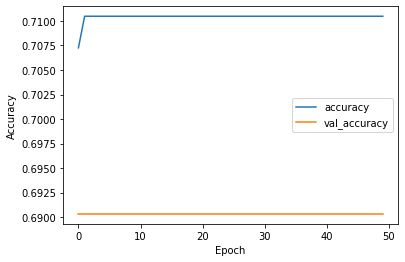

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is the DataFrame containing your CSV data
X = data[['band_gap', 'delta_e']].values
y = (data['stability_label'] == 'stable').astype(int).values # Check and adjust this line based on your data

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with a different optimizer and learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save('model.h5')

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Cleaning the processed Data

In [4]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [5]:

for i in X_train:
    print(i)

[0.         0.51621878]
[0.         0.23745933]
[0.48019865 0.49950191]
[0.         0.56303177]
[0.        0.5454642]
[0.         0.58560485]
[0.         0.51621878]
[0.         0.52758468]
[0.         0.47823873]
[0.         0.61607541]
[0.04367758 0.54946524]
[0.0402394  0.49947726]
[0.         0.50505908]
[0.         0.45785744]
[0.         0.56828802]
[0.         0.53182497]
[0.         0.57734363]
[0.         0.53457733]
[0.         0.49411709]
[0.         0.51904313]
[0.        0.5280664]
[0.         0.63950266]
[0.12237362 0.48478751]
[0.         0.65551495]
[0.1590475  0.51502056]
[0.        0.5782083]
[0.         0.20857067]
[0.         0.58139891]
[0.         0.56112947]
[0.       0.527703]
[0.        0.5548616]
[0.         0.61518261]
[0.         0.52704336]
[0.         0.55060336]
[0.         0.54814853]
[0.1609576  0.58741193]
[0.         0.52471658]
[0.         0.55901386]
[0.         0.53710946]
[0.         0.60159695]
[0.         0.52880617]
[0.22832039 0.52524977]
[0. 

### Import Required Libraries and Load Data

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming the data is in a CSV file
data_path = "data2_stable.csv"
df = pd.read_csv(data_path)


###  Preprocess Data

In [17]:
# Drop columns that might not be needed (adjust as required)
df = df.drop(columns=['entry_id', 'calculation_id', 'icsd_id', 'formationenergy_id', 'duplicate_entry_id', 'unit_cell', 'sites'])

# Separate the target variable
X = df.drop(columns=['stability_label'])
y = df['stability_label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
X_train, X_test, y_train, y_test

(         name   composition composition_generic   prototype spacegroup  \
 1230     Ta2C        C1 Ta2                 AB2         NaN      P-3m1   
 1054  Eu3BWO9  B1 Eu3 O9 W1              ABC3D9         NaN         P1   
 1281    MgCN2     C1 Mg1 N2                ABC2  NaN3(beta)       R-3m   
 380   LiAg2Sn   Ag2 Li1 Sn1                ABC2     CuHg2Ti      Fm-3m   
 1460     TiTe       Te1 Ti1                  AB        NiAs    P63/mmc   
 ...       ...           ...                 ...         ...        ...   
 1130      HfP        Hf1 P1                  AB        TiAs    P63/mmc   
 1294      W2C         C1 W2                 AB2         NaN      P-3m1   
 860     U2PN2      N2 P1 U2               AB2C2       La2O3      P-3m1   
 1459   TiFeSn   Fe1 Sn1 Ti1                 ABC      AlLiSi      F-43m   
 1126    HfBrN    Br1 Hf1 N1                 ABC       FeOCl       Pmmn   
 
         volume  ntypes  natoms  band_gap   delta_e  stability       fit  \
 1230   41.8856       

### Create Preprocessing Pipelines

In [19]:
# Define numerical features and pipeline
numerical_features = ['volume', 'ntypes', 'natoms', 'band_gap', 'delta_e', 'stability']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define categorical features and pipeline
categorical_features = ['name', 'composition', 'composition_generic', 'prototype', 'spacegroup', 'fit', 'calculation_label']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the preprocessor on the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


### Build and Train the Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Then split the data again
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Continue with preprocessing and training the model as before


In [ ]:

# Apply the preprocessing to all sets
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the validation data
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50


c:\Users\Asus\anaconda3\envs\mahesh_ml\lib\site-packages\tensorflow\python\framework\indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_6/dense_15/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_6/dense_15/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_6/dense_15/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


31/31 [==============================] - 1s 18ms/step - loss: 0.6312 - accuracy: 0.7238 - val_loss: 0.5215 - val_accuracy: 0.8226
Epoch 2/50
31/31 [==============================] - 0s 13ms/step - loss: 0.4508 - accuracy: 0.8206 - val_loss: 0.3425 - val_accuracy: 0.8831
Epoch 3/50
31/31 [==============================] - 0s 9ms/step - loss: 0.2948 - accuracy: 0.8821 - val_loss: 0.2377 - val_accuracy: 0.9113
Epoch 4/50
31/31 [==============================] - 0s 7ms/step - loss: 0.1685 - accuracy: 0.9496 - val_loss: 0.1735 - val_accuracy: 0.9516
Epoch 5/50
31/31 [==============================] - 0s 7ms/step - loss: 0.0828 - accuracy: 0.9798 - val_loss: 0.1485 - val_accuracy: 0.9637
Epoch 6/50
31/31 [==============================] - 0s 7ms/step - loss: 0.0352 - accuracy: 0.9980 - val_loss: 0.1243 - val_accuracy: 0.9637
Epoch 7/50
31/31 [==============================] - 0s 7ms/step - loss: 0.0173 - accuracy: 0.9990 - val_loss: 0.1241 - val_accuracy: 0.9637
Epoch 8/50
31/31 [===========

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print("Test loss:", loss)
print("Test accuracy:", accuracy)


10/10 [==============================] - 0s 10ms/step - loss: 0.3090 - accuracy: 0.9226
Test loss: 0.3089883327484131
Test accuracy: 0.9225806593894958


In [ ]:
from sklearn.metrics import confusion_matrix
# Make predictions on the test data
predictions = model.predict(X_test)

# If you want to convert probabilities to class labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()


# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 81  15]
 [  9 205]]


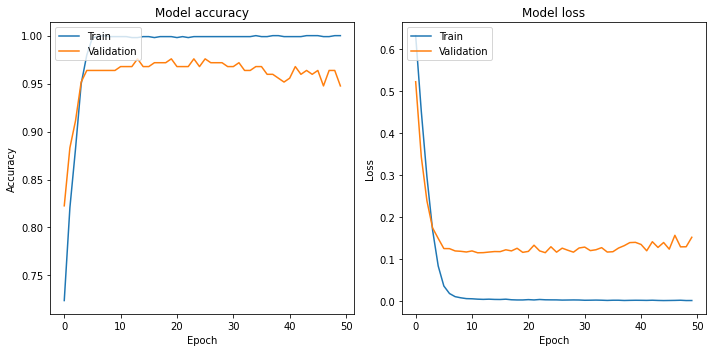

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=[10,5])
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


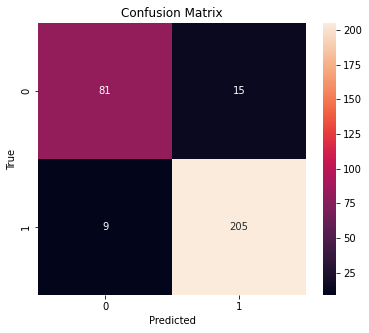

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted_labels = (model.predict(X_test) > 0.5).astype(int).flatten()
cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=[6,5])
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
